In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df_churn = pd.read_csv('churn_analysis.csv')

In [6]:
df_churn.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [7]:
df_churn.shape

(3333, 23)

* state — штат США
* account_length — длительность использования аккаунта
* area_code — деление пользователей на псевдорегионы, использующееся в телекоме
* intl_plan — подключена ли у пользователя услуга международного общения
* vmail_plan — подключена ли у пользователя услуга голосовых сообщений
* vmail_message — количество голосых сообщений, который пользователь отправил / принял
* day_calls — сколько пользователь совершил дневных звонков
* day_mins — сколько пользователь проговорил минут в течение дня
* day_charge — сколько пользователь заплатил за свою дневную активность
* eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
* night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
* intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
* custserv_calls — сколько раз пользователь позвонил в службу поддержки
* treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
* mes_estim — оценка интенсивности пользования интернет мессенджерами
* churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [21]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3333 non-null   int64  
 1   state           3333 non-null   object 
 2   account_length  3333 non-null   int64  
 3   area_code       3333 non-null   int64  
 4   intl_plan       3333 non-null   object 
 5   vmail_plan      3333 non-null   object 
 6   vmail_message   3333 non-null   int64  
 7   day_mins        3333 non-null   float64
 8   day_calls       3333 non-null   int64  
 9   day_charge      3333 non-null   float64
 10  eve_mins        3333 non-null   float64
 11  eve_calls       3333 non-null   int64  
 12  eve_charge      3333 non-null   float64
 13  night_mins      3333 non-null   float64
 14  night_calls     3333 non-null   int64  
 15  night_charge    3333 non-null   float64
 16  intl_mins       3333 non-null   float64
 17  intl_calls      3333 non-null   i

In [22]:
df_churn['churn'].value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

### Влияние штата

In [47]:
st.chi2_contingency?

In [19]:
states = df_churn['state'].unique()

In [79]:
df_churn[df_churn['treatment'] == 1].shape

(1097, 23)

In [82]:
df_churn.loc[df_churn['treatment'] == 1, 'state']

0       KS
3       OH
8       LA
12      IA
17      VT
        ..
3319    WY
3322    MD
3323    IN
3325    OH
3330    RI
Name: state, Length: 1097, dtype: object

In [80]:
cross = pd.crosstab(df_churn.loc[df_churn['treatment'] == 1, 'churn'], df_churn.loc[df_churn['treatment'] == 1, 'state'])

In [81]:
cross

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False.,19,25,11,17,10,17,25,18,16,18,...,20,11,14,18,20,18,16,22,27,20
True.,1,5,5,2,5,5,5,1,1,2,...,3,1,6,4,3,5,7,2,5,2


In [59]:
cross.iloc[:, [0, 1]]

state,AK,AL
churn,,
False.,49,72
True.,3,8


In [70]:
def chi2_check(crosstable):
    a = crosstable.iloc[0, 0]
    b = crosstable.iloc[0, 1]
    c = crosstable.iloc[1, 0]
    d = crosstable.iloc[1, 1]
    n = a + b + c + d
    
    if ((a+c)*(a+b))/n > 5:
        if ((a+c)*(c+d))/n > 5:
            if ((b+d)*(a+b))/n > 5:
                if ((b+d)*(c+d))/n > 5:
                    return True
    return False

In [83]:
chi2_table = []
for i in range(50):
    for j in range(i+1, 51):
        conditions = chi2_check(cross.iloc[:, [i, j]])
        chi2, p, dof, expect = st.chi2_contingency(cross.iloc[:, [i, j]], correction=False)
        chi2_table.append([cross.columns[i], cross.columns[j], chi2, p, conditions])

In [84]:
len(chi2_table)

1275

In [101]:
df_chi2 = pd.DataFrame.from_records(chi2_table, columns=['state1', 'state2', 'chi2', 'p', 'conditions'])
df_chi2.head()

,state1,state2,chi2,p,conditions
0,AK,AL,1.546717,0.213621,False
1,AK,AR,4.410000,0.035729,False
2,AK,AZ,0.419079,0.517397,False
3,AK,CA,4.844349,0.027737,False
4,AK,CO,2.688636,0.101066,False


In [88]:
df_chi2[df_chi2['p'] <= 0.05].shape

(34, 5)

In [92]:
chi2_table_correc = []
for i in range(50):
    for j in range(i+1, 51):
        chi2, p, dof, expect = st.chi2_contingency(cross.iloc[:, [i, j]], correction=True)
        chi2_table_correc.append([cross.columns[i], cross.columns[j], chi2, p])

In [93]:
len(chi2_table_correc)

1275

In [100]:
df_chi2_correc = pd.DataFrame.from_records(chi2_table_correc, columns=['state1', 'state2', 'chi2', 'p'])
df_chi2_correc.head()

,state1,state2,chi2,p
0,AK,AL,0.639205,0.423999
1,AK,AR,2.722500,0.098943
2,AK,AZ,0.002138,0.963119
3,AK,CA,3.054957,0.080491
4,AK,CO,1.435795,0.230821


In [98]:
df_chi2_correc[df_chi2_correc['p'] <= 0.05]

,state1,state2,chi2,p


In [102]:
df_chi2[['state12', 'state22', 'chi2_correc', 'p_correc']] = pd.DataFrame.from_records(chi2_table_correc)
df_chi2.head()

,state1,state2,chi2,p,conditions,state12,state22,chi2_correc,p_correc
0,AK,AL,1.546717,0.213621,False,AK,AL,0.639205,0.423999
1,AK,AR,4.410000,0.035729,False,AK,AR,2.722500,0.098943
2,AK,AZ,0.419079,0.517397,False,AK,AZ,0.002138,0.963119
3,AK,CA,4.844349,0.027737,False,AK,CA,3.054957,0.080491
4,AK,CO,2.688636,0.101066,False,AK,CO,1.435795,0.230821


In [107]:
df_chi2.drop(['state12', 'state22'], axis=1)

KeyError: "['state12' 'state22'] not found in axis"

In [110]:
df_chi2.head()

,state1,state2,chi2,p,conditions,chi2_correc,p_correc,p_cor>p
0,AK,AL,1.546717,0.213621,False,0.639205,0.423999,True
1,AK,AR,4.410000,0.035729,False,2.722500,0.098943,True
2,AK,AZ,0.419079,0.517397,False,0.002138,0.963119,True
3,AK,CA,4.844349,0.027737,False,3.054957,0.080491,True
4,AK,CO,2.688636,0.101066,False,1.435795,0.230821,True


In [114]:
df_chi2['p_cor>=p'] = df_chi2['p_correc'] >= df_chi2['p']

In [115]:
df_chi2['p_cor>=p'].value_counts()

True     1083
False     192
Name: p_cor>=p, dtype: int64

In [116]:
df_chi2[df_chi2['p_cor>=p']== False]

,state1,state2,chi2,p,conditions,chi2_correc,p_correc,p_cor>p,p_cor>=p
6,AK,DC,0.001387,0.970293,False,0.474671,0.490846,False,False
7,AK,DE,0.013992,0.905841,False,0.373498,0.541104,False,False
10,AK,HI,0.100310,0.751458,False,0.184755,0.667318,False,False
31,AK,NM,0.074075,0.785493,False,0.111572,0.738361,False,False
65,AL,KY,0.004428,0.946943,False,0.089674,0.764592,False,False
...,...,...,...,...,...,...,...,...,...
1204,PA,VT,0.001375,0.970415,False,0.117689,0.731555,False,False
1225,SC,VT,0.026793,0.869978,False,0.038582,0.844278,False,False
1246,TN,WY,0.005539,0.940671,False,0.311584,0.576710,False,False
1250,TX,WA,0.000959,0.975298,True,0.091141,0.762731,False,False


In [119]:
st.fisher_exact?

In [120]:
fisher_table = []
for i in range(50):
    for j in range(i+1, 51):
        oddsraito, p = st.fisher_exact(cross.iloc[:, [i, j]])
        fisher_table.append([cross.columns[i], cross.columns[j], oddsraito, p])

In [121]:
df_ficher = pd.DataFrame.from_records(fisher_table, columns=['state1', 'state2', 'oddsraito', 'p'])
df_ficher.head()

,state1,state2,oddsraito,p
0,AK,AL,3.800000,0.381063
1,AK,AR,8.636364,0.068862
2,AK,AZ,2.235294,0.604990
3,AK,CA,9.500000,0.063965
4,AK,CO,5.588235,0.187034


In [127]:
print('Mean p: chi2 - %.4f, chi2_cor - %.4f, ficher - %.4f' \
      % (df_chi2['p'].mean(), df_chi2['p_correc'].mean(), df_ficher['p'].mean()))

Mean p: chi2 - 0.5018, chi2_cor - 0.6641, ficher - 0.6483


### Корреляции

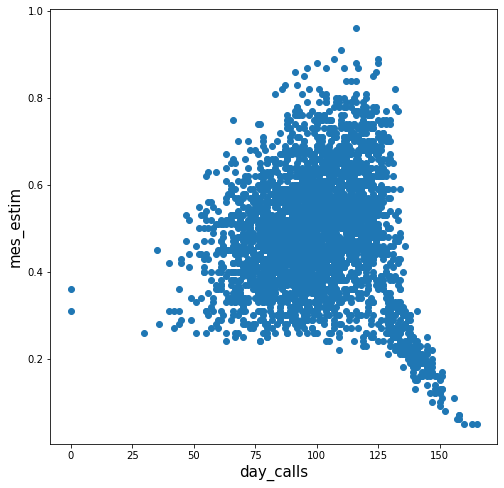

In [158]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df_churn['day_calls'], df_churn['mes_estim'])

ax.set_xlabel('day_calls', fontsize=15)
ax.set_ylabel('mes_estim', fontsize=15)

plt.show()

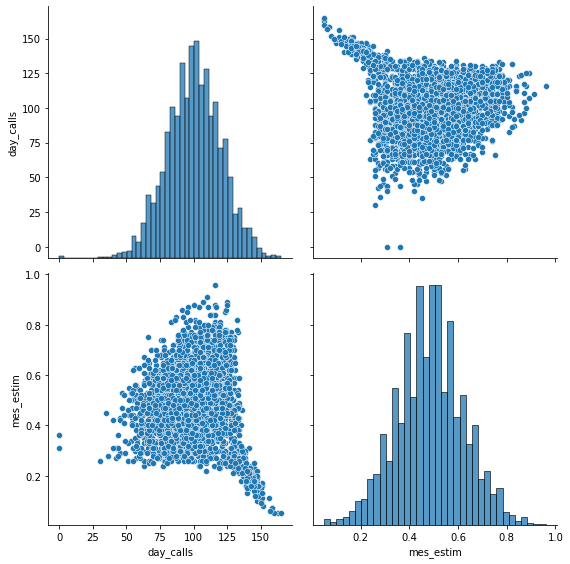

In [164]:
g = sns.PairGrid(df_churn[['day_calls', 'mes_estim']], height=4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

plt.show()

In [174]:
import statsmodels.graphics.gofplots

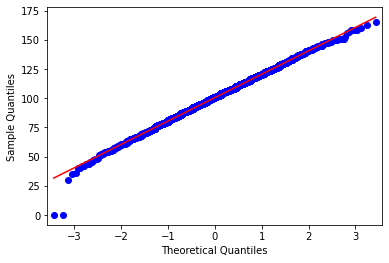

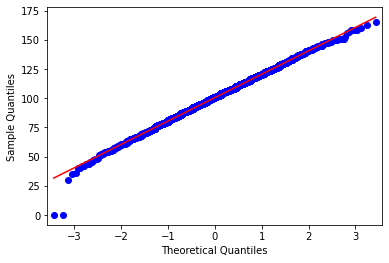

In [179]:
statsmodels.graphics.gofplots.qqplot(df_churn['day_calls'], line='s')

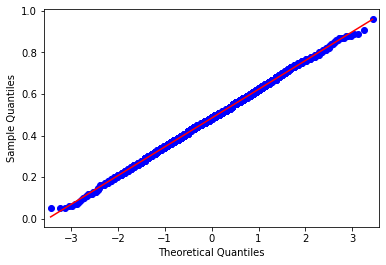

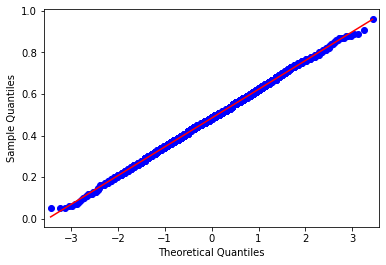

In [180]:
statsmodels.graphics.gofplots.qqplot(df_churn['mes_estim'], line='s')

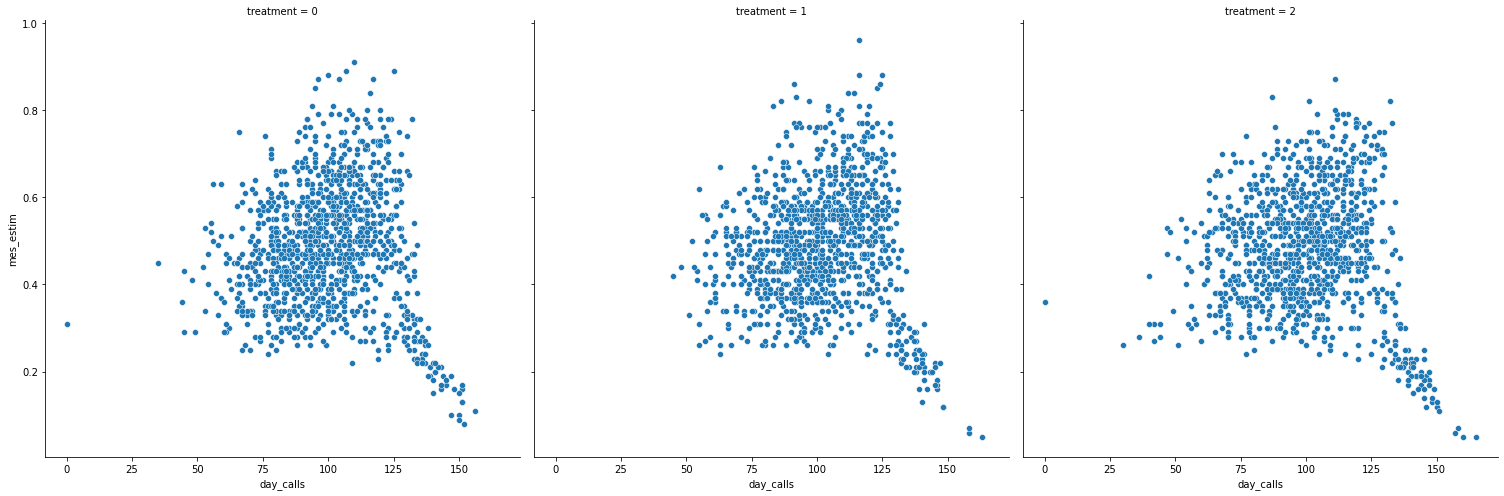

In [144]:
g = sns.FacetGrid(df_churn, col="treatment", height=7)
g.map(sns.scatterplot, "day_calls", 'mes_estim')

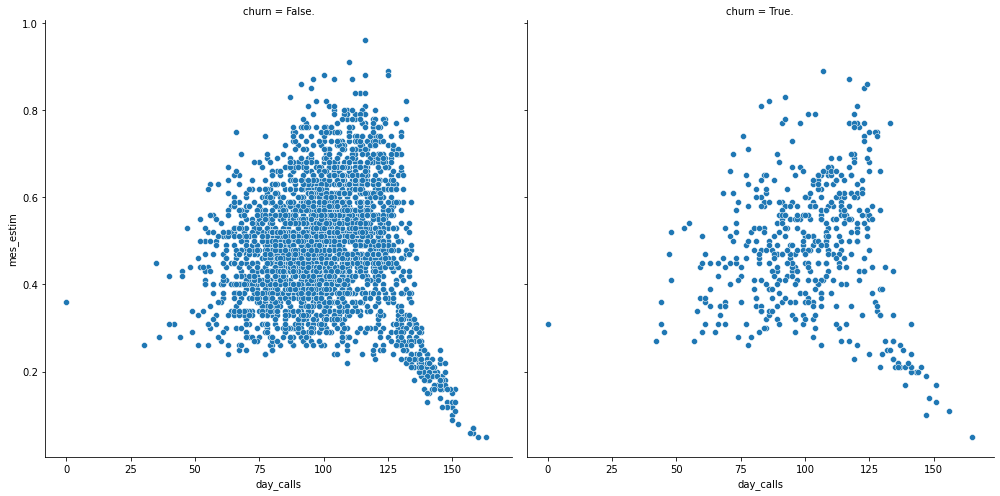

In [145]:
g = sns.FacetGrid(df_churn, col="churn", height=7)
g.map(sns.scatterplot, "day_calls", 'mes_estim')

In [147]:
df_churn[['day_calls', 'mes_estim']].corr()

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


In [166]:
#тоже Пирсон
st.pearsonr(df_churn['day_calls'], df_churn['mes_estim'])

(-0.05179435058757252, 0.0027798836869732313)

In [148]:
df_churn[['day_calls', 'mes_estim']].corr(method='spearman')

,day_calls,mes_estim
day_calls,1.00000,0.04335
mes_estim,0.04335,1.00000


In [167]:
#тоже Спирман
st.spearmanr(df_churn['day_calls'], df_churn['mes_estim'])

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170543)

In [201]:
chi2_cr = st.chi2_contingency(cross)
chi2_cr

(44.05271236692549,
 0.709759004277847,
 50,
 array([[16.7183227 , 25.07748405, 13.37465816, 15.88240656, 12.53874202,
         18.39015497, 25.07748405, 15.88240656, 14.21057429, 16.7183227 ,
         17.55423883, 10.86690975, 12.53874202, 15.04649043, 10.03099362,
         19.2260711 , 20.89790337, 20.89790337, 12.53874202, 20.06198724,
         20.06198724, 23.40565178, 18.39015497, 17.55423883, 17.55423883,
         20.06198724, 21.73381951, 15.88240656, 20.06198724, 20.06198724,
         10.03099362, 20.06198724, 24.24156791, 20.06198724, 27.58523245,
         20.06198724, 10.86690975, 17.55423883, 15.04649043, 18.39015497,
         17.55423883, 19.2260711 , 10.03099362, 16.7183227 , 18.39015497,
         19.2260711 , 19.2260711 , 19.2260711 , 20.06198724, 26.74931632,
         18.39015497],
        [ 3.2816773 ,  4.92251595,  2.62534184,  3.11759344,  2.46125798,
          3.60984503,  4.92251595,  3.11759344,  2.78942571,  3.2816773 ,
          3.44576117,  2.13309025,  2.461257

In [196]:
cross.sum().sum()

1097

In [198]:
fi = np.sqrt(chi2_cr[0]/(cross.sum().sum() * (2 - 1)))
round(fi, 4)

0.2004

In [200]:
st.chi2_contingency?

In [204]:
df_churn.churn.value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [205]:
df_churn['churn'] = df_churn['churn'].apply(lambda x: 1 if x == 'True.' else 0)
df_churn.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [206]:
treat_0 = df_churn.loc[df_churn['treatment'] == 0, 'churn']
treat_2 = df_churn.loc[df_churn['treatment'] == 2, 'churn']
control = df_churn.loc[df_churn['treatment'] == 1, 'churn']

In [207]:
control

0       0
3       0
8       0
12      0
17      0
       ..
3319    0
3322    1
3323    1
3325    0
3330    0
Name: churn, Length: 1097, dtype: int64

In [209]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [212]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - st.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return st.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - st.norm.cdf(z_stat)

In [215]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [226]:
z0 = proportions_diff_z_stat_ind(treat_0, control)
z2 = proportions_diff_z_stat_ind(treat_2, control)
p0 = proportions_diff_z_test(proportions_diff_z_stat_ind(treat_0, control))
p2 = proportions_diff_z_test(proportions_diff_z_stat_ind(treat_2, control))
p0_2 = proportions_diff_z_test(proportions_diff_z_stat_ind(treat_2, treat_0))
reject, p_corrected, a1, a2 = multipletests([p0, p2, p0_2], alpha = 0.05, method = 'holm')

In [227]:
print("treatment 0: %f, p-value: %f" % (z0, p_corrected[0]))

treatment 0: -1.204669, p-value: 0.312849


In [228]:
print("treatment 2: %f, p-value: %f" % (z2, p_corrected[1]))

treatment 2: -2.599055, p-value: 0.028044


In [230]:
print("treatment 0_2 p-value: %f" % (p_corrected[2]))

treatment 0_2 p-value: 0.312849
